# Project: Analyzing NYC High School Data

The SAT, or Scholastic Aptitude Test, is a test given to graduating high schoolers in the US every year. The SAT has 3 sections, each of which is worth a maximum of 800 points. The SAT is used by colleges to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on the SAT scores of students, along with additional demographic datasets.

- SAT scores by school -- SAT scores for each high school in New York City.
- School attendance -- attendance information on every school in NYC.
- Class size -- class size information for each school in NYC.
- AP test results -- Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
- Graduation outcomes -- percentage of students who graduated, and other outcome information.
- Demographics -- demographic information for each school.
- School survey -- surveys of parents, teachers, and students at each school.

## Read In The Data

We'll read each file into a Pandas Dataframe, and then store all of the Dataframes in a dictionary. This will make it easy to reference the Dataframes later on, while storing them all into a single variable for convenience.

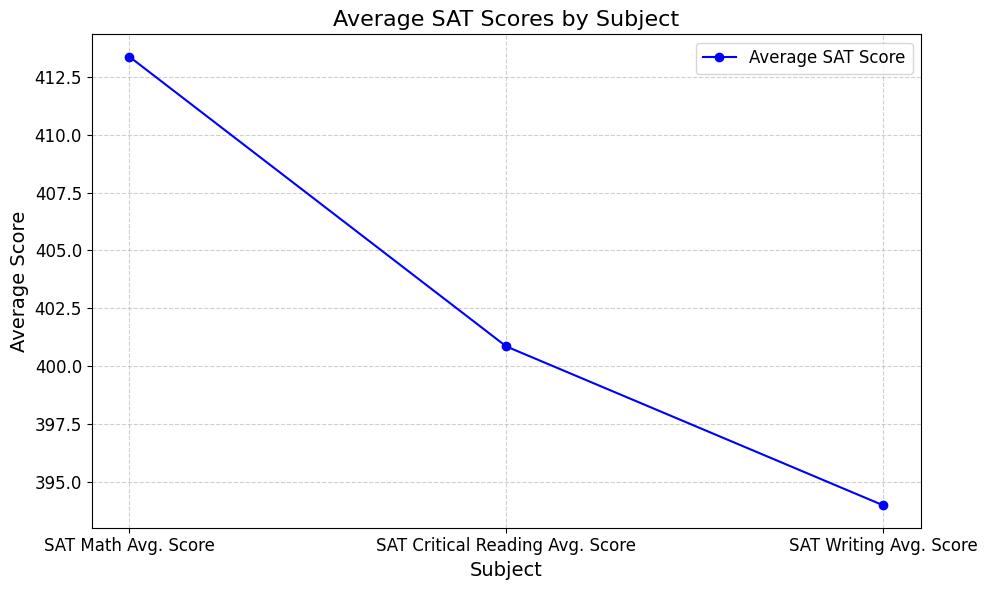

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

# Example Plot: Visualizing average SAT scores using a line plot
sat_results = data.get("sat_results", None)

if sat_results is not None:
    # Select relevant SAT score columns (adjust column names as necessary)
    columns_to_plot = [
        "SAT Math Avg. Score",
        "SAT Critical Reading Avg. Score",
        "SAT Writing Avg. Score"
    ]
    
    # Check if columns exist
    valid_columns = [col for col in columns_to_plot if col in sat_results.columns]
    if not valid_columns:
        print("No valid SAT score columns found for visualization.")
    else:
        # Convert columns to numeric, coercing errors to NaN
        for col in valid_columns:
            sat_results[col] = pd.to_numeric(sat_results[col], errors='coerce')

        # Calculate mean scores (ignoring NaN values)
        mean_scores = sat_results[valid_columns].mean()

        # Prepare data for plotting
        mean_scores = mean_scores.reset_index()
        mean_scores.columns = ["Subject", "Average Score"]

        # Create line plot
        plt.figure(figsize=(10, 6))
        plt.plot(mean_scores["Subject"], mean_scores["Average Score"], marker='o', linestyle='-', color='blue', label='Average SAT Score')
        plt.title("Average SAT Scores by Subject", fontsize=16)
        plt.xlabel("Subject", fontsize=14)
        plt.ylabel("Average Score", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()
else:
    print("SAT results data is missing.")


## Exploring The SAT Data

In [2]:
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0


In [3]:
for k in data:
    print(data[k].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

## Reading In The Survey Data

In [4]:
all_survey = pandas.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pandas.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pandas.concat([all_survey, d75_survey], axis=0)

survey.head()

NameError: name 'pandas' is not defined

## Cleaning Up The Surveys

In [ ]:
# Make copy of dbn column.
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

survey.head()

## Inserting DBN Fields

In [ ]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

## Combining The SAT Scores

In [ ]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pandas.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

data['sat_results'][cols[2]]
# Print to see if everything went well.
print(data['sat_results']['sat_score'].head())

## Parsing Coordinates For Each School

In [ ]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lat"] = pandas.to_numeric(data["hs_directory"]["lat"], errors="coerce")

data["hs_directory"].head()

## Extracting The Longitude

We parsed the latitude from the Location 1 column. Now we'll just need to do the same for the longitude.

In [ ]:
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)
data["hs_directory"]["lon"] = pandas.to_numeric(data["hs_directory"]["lon"], errors="coerce")

## Condensing The Data

The first step that we'll need to take before we can combine the data is to condense some of the datasets. Previously, we noticed that while sat_results was unique on the DBN column, and only contained a single row for each unique DBN value, some of the other datasets, such as class_size had duplicated DBN values.

### Condensing Class Size

In [ ]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head()

### Computing Average Class Sizes

We don't want to only select a certain type of class in which to base our class size data on. We want our class size data to be for every single class a school offers. What we can do is take the average across all the classes a school offers. This will give us unique DBN values, but also incorporate as much data as possible into the average.

In [ ]:
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

### Condensing Demographics

Now that we've finished condensing class_size, let's condense demographics

In [ ]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["demographics"].head()

### Condensing Graduation

In the graduation data, the Demographic and Cohort columns are what prevent DBN from being unique. A Cohort appears to be which year the data was recorded for, and the Demographic appears to be in which group the data was collected. In this case, we want to pick data from the most recent Cohort available, 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [ ]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data["graduation"].head()

### Converting AP Scores To Numeric

In [ ]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pandas.to_numeric(data["ap_2010"][col], errors="coerce")
    
data["ap_2010"].head()

## Combining The Datasets

### Performing The Left Joins

In [ ]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

combined.head()

In [ ]:
combined.shape

### Performing The Inner Joins

In [ ]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
    
combined.head()

In [ ]:
combined.shape

### Filling In Missing Values

In [ ]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head()

## Adding A School District Column

In [ ]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

combined["school_dist"].head()

## Finding Correlations

In [ ]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

## Plotting Survey Correlations

In [ ]:
%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar(figsize=(12,8), color = 'orange')

## Plotting Enrollment

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score', figsize = (12, 8), s = 60, color ='blue')
plt.show()

## Exploring Schools With Low SAT Scores And Enrollment

In [ ]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

## Plotting Language Learning Percentage

In [ ]:
combined.plot.scatter(x='ell_percent', y='sat_score', figsize = (12,8), s=60, color = 'Blue')
plt.show()

## Mapping The Schools

In [ ]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(8,8))

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, marker = '.')

plt.show()

## Plotting Out Statistics

In [ ]:
plt.figure(figsize=(8,8))

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()

m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, marker = '.', c=combined["ell_percent"], cmap="summer")
plt.show()

## Calculating District Level Statistics

In [ ]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
districts.head()

## Plotting Ell_percent By District

In [ ]:
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')


longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=80, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

## Safety And SAT Scores

We'll investigate safety scores.

In [ ]:
combined.plot.scatter("saf_s_11", "sat_score", figsize = (12,8), s =60, color = 'blue')

# Plotting safety

In [ ]:
import matplotlib.pyplot as plt
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)


plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='LightBlue')
m.drawcoastlines(color='grey', linewidth=1)
m.fillcontinents(color='white',lake_color='#85A6D9')

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

It looks like Upper Manhattan and parts of Queens and the Bronx tend to have lower safety scores, whereas Brooklyn has high safety scores.

# Racial differences in SAT scores

There are a few columns that indicate the percentage of each race at a given school:

- white_per
- asian_per
- black_per
- hispanic_per

By plotting out the correlations between these columns and sat_score, we can see if there are any racial differences in SAT performance.

In [ ]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar(figsize = (12,8))

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.


In [ ]:
combined.plot.scatter("hispanic_per", "sat_score", figsize=(12,8), s =60, color = 'Blue')

In [ ]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

In [ ]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

## Gender Differences In SAT Scores

In [ ]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar(figsize = (8, 6))

In [ ]:
combined.plot.scatter("female_per", "sat_score", figsize = (12, 8), s = 60)

In [ ]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

These schools appears to be very selective liberal arts schools that have high academic standards.

## AP Exam Scores Vs SAT Scores

In the US, the Advanced Placement, or AP, exams, are exams that high schoolers take in order to gain college credit. AP exams can be taken in many different subjects, and passing the AP exam means that colleges may grant you credits.


In [ ]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score', figsize = (12, 8), s = 60)

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.